In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [2]:
print(tf.__version__)

2.15.0


In [3]:
#dataset of images with digits
mnist = tf.keras.datasets.mnist
mnistData= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 19s 2us/step


In [4]:
#Split into train and test
(X_train, y_train), (X_test, y_test) = mnistData

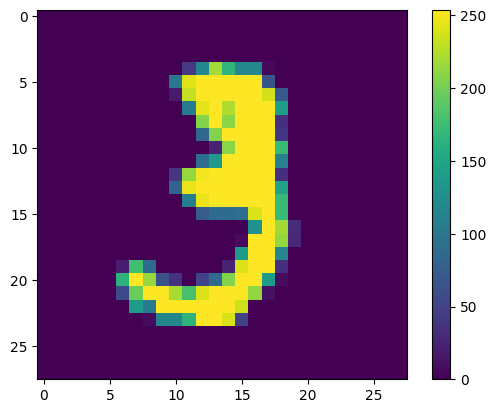

In [5]:
#Vizualize the first image on the training set
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.show()

In [6]:
#Preprocess data
#imges 28x28 np arrays, wil pixel values ranging from 0 to 255
#Rescaling these to be between 0 and 1 (dividing by 255)
X_train, X_test = X_train/255, X_test/255


In [7]:
#model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

C:\Users\josej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#model compilation
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7142 - loss: 1.0805 - val_accuracy: 0.9057 - val_loss: 0.3624
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8919 - loss: 0.3870 - val_accuracy: 0.9192 - val_loss: 0.2947
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9065 - loss: 0.3295 - val_accuracy: 0.9269 - val_loss: 0.2600
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9200 - loss: 0.2826 - val_accuracy: 0.9343 - val_loss: 0.2368
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9263 - loss: 0.2557 - val_accuracy: 0.9398 - val_loss: 0.2174


In [10]:
# Evaluate the model
# Checking how the model perfoms on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9293 - loss: 0.2519
Test accuracy: 0.9394000172615051


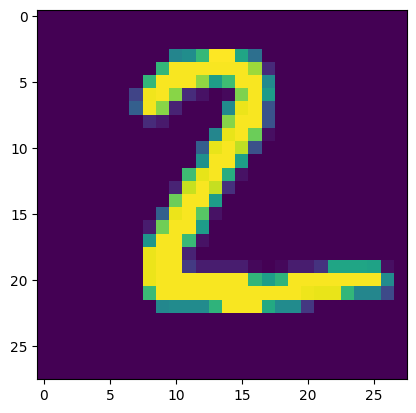

In [11]:
# Pick and Visualize a single test image from test data
single_test_image = X_test[1]
single_test_image = np.array(single_test_image, dtype= 'float')
plt.imshow(single_test_image)
plt.show()

In [12]:
# Predict the test data using the model
single_test_image = (np.expand_dims(single_test_image,0))
pred = model.predict (single_test_image)
digit_value = np.argmax(pred[0])
digit_value

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


2

In [13]:
model.save("model.h5")